# This code represents an implementation of the Single Swap Hueristic without using libraries that would give us the cluster centers directly

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
#This cell is for initialization using Greedy k-Means
def read_df( path ):
    return pd.read_csv( path, header = None )

def get_index( temp_df, C ):
    #Get the min euclidean distance of each row in temp_df from all centers in C
    distanceVector = np.amin( euclidean_distances( temp_df, C ), axis=1 )
    
    #Return the index of the row having maximum minimum euclidean distance
    return np.argmax(distanceVector)

def greedy_kcenters( df, k ):
    
    #Create copy of original dataframe
    temp_df = df.copy()
    
    #Initialize the first center
    C = df.sample( 1 )
    
    #Remove this sample from df so that it does not come in further calculations
    temp_df.drop(C.index,inplace = True)
    #and change indices to 0,1,2,...,n-1
    temp_df.index = list( range( temp_df.shape[0] ) )
    
    while C.shape[0] < k:
        
        #Get index of data point that has maximum minimum distance from any center
        ind = get_index( temp_df, C )
        
        #Append data in temp_df at index ind into C
        C = C.append( temp_df.loc[ind] )
        
        #Remove that row from temp_df
        temp_df.drop(ind,inplace = True)
        #and change indices to 0,1,2,...,n-1
        temp_df.index = list( range( temp_df.shape[0] ) )
    
    #Delete temp_df so that it does not take space
    del temp_df
    
    #Return centers and final objective function value
    return( C, np.amax(np.amin(euclidean_distances( df, C ), axis=1 )) )

In [3]:
def get_cost( df, Q_new ):
    
    #Get the min euclidean distance of each row in temp_df from all centers in C
    distanceVector = np.amin( euclidean_distances( df, Q_new ), axis=1 )
    
    #Return the index of the row having maximum minimum euclidean distance
    return np.amax(distanceVector)

#Get the distance matrix for the dataframe and centers
#distanceMatrix = euclidean_distances( df, Q_ )
    
#Return the sum of minimum distances
#return pd.DataFrame(distanceMatrix).min(axis=1).sum()'''

In [4]:
def single_swap( path, k ):
    
    #Reading the file
    df = read_df( path )
    
    #Get the centers using the Greedy k Centers algorithm
    Q , useless_dist = greedy_kcenters( df, k )
    del useless_dist
    
    #Compute cost of solution
    C0 = get_cost( df, Q )
    print("Greedy k-means cost= ", C0)
    
    #Create a counter for number of centers
    cent_count = Q.shape[0]
    
    back2begin = False
    
    while cent_count > 0:
        
        for i in range( Q.shape[0] ):  
            if back2begin == True:
                back2begin = False
                break
                
            #Create a copy of the dataframe df without the centers Q
            temp_df = pd.concat( [df,Q] )
            temp_df.drop_duplicates(keep=False)
            temp_df.index = list( range( temp_df.shape[0] ) )
            
            #Swap
            while temp_df.shape[0] != 0:
                Q_new = pd.concat( [ Q.drop(Q.index[i]), temp_df.loc[[0]] ] )
                
                #Get cost of new centers
                C_new = get_cost( df, Q_new )

                #Check if cost reduced by more than 1-gamma, where gamma = 0.05
                if C_new <= 0.95 * C0:
                    print('Swapping')
                    Q = Q_new.copy()
                    print("Cost after swapping = ", C_new)
                    #temp_df = pd.concat( [df,Q] )
                    #temp_df.drop_duplicates(keep=False)
                    #temp_df.index = list( range( temp_df.shape[0] ) )
                    back2begin = True
                    cent_count = Q.shape[0] 
                    C0 = C_new
                    break
                else:
                    temp_df.drop(0, inplace=True)
                    temp_df.index = list( range( temp_df.shape[0] ) )
            if back2begin == False:
                print(cent_count)
                cent_count -= 1
    
    #Return the centers
    return( Q )

In [7]:
centers = single_swap("clustering.csv", 2)

Greedy k-means cost=  5.52884398767
Swapping
Cost after swapping =  5.23297731851
2
1


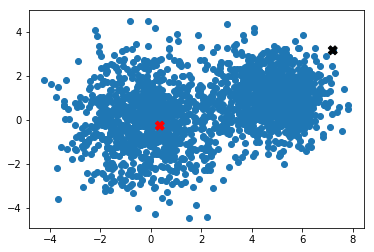

In [8]:
trial_df = pd.read_csv("clustering.csv", header=None)
plt.scatter(trial_df[0], trial_df[1])
plt.scatter(centers[0],centers[1], marker = "X", color = ['black', 'red'], s =80)
plt.show()

In [9]:
centers = single_swap("ShapedData.csv", 4)

Greedy k-means cost=  4.50907511386
4
3
Swapping
Cost after swapping =  3.8890286705
4
3
2
1


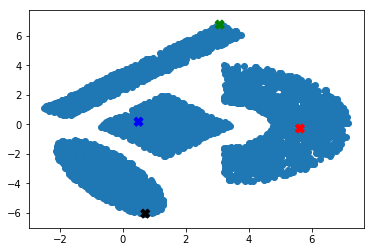

In [10]:
trial_df = pd.read_csv("ShapedData.csv", header=None)
plt.scatter(trial_df[0], trial_df[1])
plt.scatter(centers[0],centers[1], marker = "X", color = ['blue', 'green','black','red'], s =80)
plt.show()